dataset : https://www.kaggle.com/sonalidasgupta95/churn-prediction-of-bank-customers

ref_1 : https://towardsdatascience.com/customer-churn-analysis-4f77cc70b3bd

ref_2 : https://towardsdatascience.com/a-practical-guide-for-exploratory-data-analysis-churn-dataset-508b6da2d594

ref_3 : https://rstudio-pubs-static.s3.amazonaws.com/565148_6e82a5c320f14869bf63e23bcf59ce9b.html


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Property:

CreditScore: the range of credit score is from 350 to 850

Geography: the regional bank has customers from three countries: France, Germany and Spain

Age: the range of customer’s age is from 18 to 92

Tenure: years that the customer has stayed with the bank

Balance: the amount of money available for withdrawal

NumOfProducts: number of products that the customers use in the bank

IsActiveMember: 1 indicates is active

EstimatedSalary: customer’s self-reported annual salary

Exited: whether the customer has churned (closed the bank account), 1 indicates churn.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
# cleaning data

df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
del df["RowNumber"]

In [6]:
# looking at the summary
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Text(18.029461805555556, 0.5, 'Estimated Salary')

<Figure size 1440x1440 with 0 Axes>

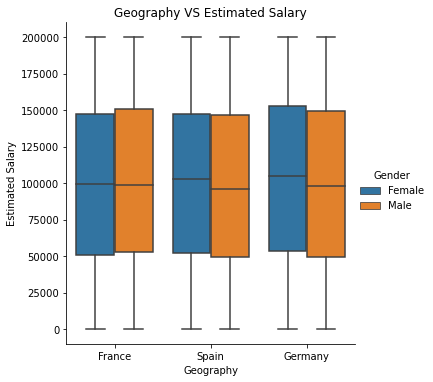

In [7]:
# Looking at Geography and Gender Distribution against Estimated Salary
plt.figure(figsize=(20,20))
sns.catplot(x="Geography", y="EstimatedSalary", hue="Gender", kind="box", data=df)
plt.title("Geography VS Estimated Salary")
plt.xlabel("Geography")
plt.ylabel("Estimated Salary")

In [39]:
df.drop(['CustomerId','Surname'], axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [40]:
df[['Geography','Gender','Exited']].groupby(['Geography','Gender']).agg(['mean','count'])

Exited      
                      mean count
Geography Gender                
France    Female  0.203450  2261
          Male    0.127134  2753
Germany   Female  0.375524  1193
          Male    0.278116  1316
Spain     Female  0.212121  1089
          Male    0.131124  1388

In [41]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

C:\Users\halil\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\halil\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


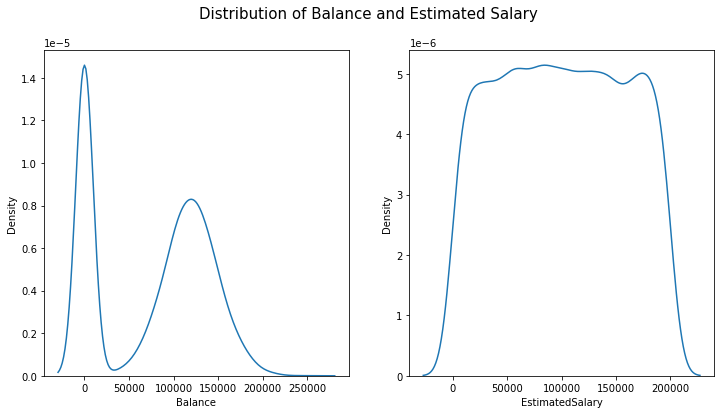

In [42]:
fig , axs = plt.subplots(ncols=2, figsize=(12,6))
fig.suptitle("Distribution of Balance and Estimated Salary", fontsize=15)
sns.distplot(df.Balance, hist=False, ax=axs[0])
sns.distplot(df.EstimatedSalary, hist=False, ax=axs[1])

In [43]:
df['Balance_binary'] = df['Balance'].where(df['Balance'] == 0, 1)
df['Balance_binary'].value_counts()

1.0    6383
0.0    3617
Name: Balance_binary, dtype: int64

In [44]:
df[['Balance_binary','Exited']].groupby('Balance_binary').mean()

,Exited
Balance_binary,
0.0,0.138236
1.0,0.240796


In [45]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Balance_binary
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1.0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.0


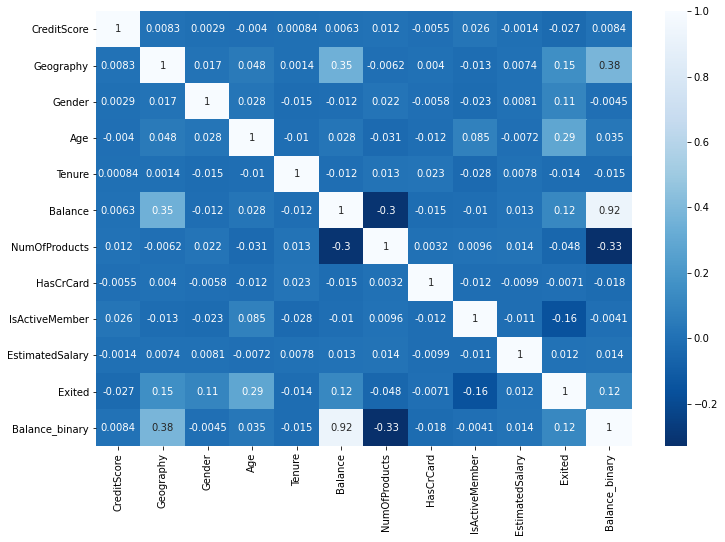

In [46]:
df['Gender'].replace({'Male':0, 'Female':1}, inplace=True)
df['Geography'].replace({'France':0, 'Spain':1, 'Germany':2 }, inplace=True)
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='Blues_r', annot=True)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
 11  Balance_binary   10000 non-null  float64
dtypes: float64(3), int64(9)
memory usage: 937.6 KB


In [47]:
df[['Exited','Age']].groupby('Exited').mean()

,Age
Exited,
0,37.408389
1,44.837997


In [48]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Balance_binary
0,619,0,1,42,2,0.00,1,1,1,101348.88,1,0.0
1,608,1,1,41,1,83807.86,1,0,1,112542.58,0,1.0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1,1.0
3,699,0,1,39,1,0.00,2,0,0,93826.63,0,0.0
4,850,1,1,43,2,125510.82,1,1,1,79084.10,0,1.0


In [51]:
# Selecting and Preparing the Feature Set and Target
X = df[["CreditScore", "Geography", "Gender", "Age", "Tenure","Balance","NumOfProducts","HasCrCard","IsActiveMember","EstimatedSalary"]].values
y=df[["Exited"]]

In [52]:
X[0:5], y[0:5]

(array([[6.1900000e+02, 0.0000000e+00, 1.0000000e+00, 4.2000000e+01,
         2.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.0000000e+00,
         1.0000000e+00, 1.0134888e+05],
        [6.0800000e+02, 1.0000000e+00, 1.0000000e+00, 4.1000000e+01,
         1.0000000e+00, 8.3807860e+04, 1.0000000e+00, 0.0000000e+00,
         1.0000000e+00, 1.1254258e+05],
        [5.0200000e+02, 0.0000000e+00, 1.0000000e+00, 4.2000000e+01,
         8.0000000e+00, 1.5966080e+05, 3.0000000e+00, 1.0000000e+00,
         0.0000000e+00, 1.1393157e+05],
        [6.9900000e+02, 0.0000000e+00, 1.0000000e+00, 3.9000000e+01,
         1.0000000e+00, 0.0000000e+00, 2.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 9.3826630e+04],
        [8.5000000e+02, 1.0000000e+00, 1.0000000e+00, 4.3000000e+01,
         2.0000000e+00, 1.2551082e+05, 1.0000000e+00, 1.0000000e+00,
         1.0000000e+00, 7.9084100e+04]]),
    Exited
 0       1
 1       0
 2       1
 3       0
 4       0)

In [55]:
# split train and test data
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=3)

In [56]:
# create model using DecisionTree Classifier and fit training data
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_trainset, y_trainset)

DecisionTreeClassifier()

In [57]:
# create prediction
dt_pred = dt_model.predict(X_testset)
dt_pred[0:5]

array([1, 0, 1, 0, 0], dtype=int64)

In [58]:
# Evaluating the prediction model
from sklearn import metrics
metrics.accuracy_score(y_testset, dt_pred)

0.791

In [59]:
# create Random Forest Decision Tree model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_trainset, y_trainset.values.ravel())

RandomForestClassifier()

In [60]:
# create prediction using rf_model
rf_pred = rf_model.predict(X_testset)
rf_pred[0:5]

array([0, 0, 1, 0, 0], dtype=int64)

In [61]:
# evaluate the model
metrics.accuracy_score(y_testset, rf_pred)

0.861